<a href="https://colab.research.google.com/github/nb20593/data-science/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
np.set_printoptions(precision = 3)

In [172]:
#To create column name from 0 to 100
column_name= []
for i in range(101):
  column_name.append(str(i))

In [173]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv",names=column_name)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-7.86,99.00,99.00,

In [174]:
#Dropping the column contains rating numbers, column '0'
df_copy_1 = df.copy()
df_copy_1.drop('0',axis=1,inplace=True)
df_copy_2 = df_copy_1.copy()
validation_set = df_copy_1.copy()
rate_nr = df['0']
#Replacing 99.00 to NaN values which represent as not rated.
df_copy_1.replace(99.00, np.NaN, inplace=True)

In [175]:
#Getting all the values are 100% rated (No unrated)
a = np.where(rate_nr==100)
b = pd.DataFrame(columns=column_name[1:])
for index in a:
  validation_set.iloc[index,:]
possible_validation = validation_set.iloc[index,:]
possible_validation

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,-6.80,-5.73,-5.00,-8.59,0.49,-8.93,-3.69,-2.18,-2.28,-6.12,-3.01,-0.58,-2.38,-7.77,-2.23,-2.28,-5.24,-5.53,-0.68,-6.94,-3.93,-0.34,-6.60,-5.49,-1.55,-0.49,-6.21,-8.06,-5.39,-7.04,...,-6.65,-2.86,-4.61,-9.42,-7.91,-9.81,-9.42,-8.98,-1.94,-6.99,-9.66,-5.19,-5.00,-4.42,-7.28,-6.50,-4.32,-6.94,-9.85,0.73,-6.21,-2.86,-7.62,-6.12,-0.29,-1.41,-3.93,-1.94,-5.68,-4.71,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,8.20,-7.86,-6.94,-7.96,0.29,-9.90,-7.09,-7.18,1.02,-0.29,-4.71,-7.43,1.12,-8.25,3.79,0.10,3.45,-3.45,7.57,-4.17,-0.44,9.27,5.83,-3.40,-5.44,1.60,-7.14,3.01,-6.07,5.68,...,-3.20,-6.12,-2.91,-9.22,-2.62,-7.33,-3.25,-4.22,-9.81,-2.09,-9.90,-3.79,0.49,-7.86,-9.85,1.80,-4.17,-2.38,-9.13,-8.88,3.54,-4.56,-5.44,-5.97,-9.90,-0.34,-4.13,-0.10,-0.24,-7.96,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,-2.91,-0.29,-4.85,-0.49,-8.74,-6.99,-8.74,-2.91,-3.35,-0.29,3.98,-1.60,-0.29,1.21,3.79,2.91,4.85,2.28,0.97,-0.29,6.36,0.53,-0.29,4.66,3.35,0.97,-3.11,-1.84,4.42,-4.42,...,1.21,5.53,1.41,-6.50,4.85,4.85,2.62,1.41,6.36,1.41,-4.76,4.17,-2.04,-6.31,-0.29,-0.29,0.78,-0.29,-0.29,-0.29,-0.29,-3.20,-0.29,-3.20,-3.40,-0.29,-0.29,5.73,4.56,-2.23,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
11,1.31,1.80,2.57,-2.38,0.73,0.73,-0.97,5.00,-7.23,-1.36,3.83,1.75,5.63,-2.86,-1.80,-2.04,5.53,-0.29,-0.58,1.36,2.43,0.63,-4.61,-4.37,-1.65,-1.36,7.57,-0.15,5.97,-3.50,0.24,4.27,-0.68,-3.79,7.62,5.15,2.43,0.10,0.83,-2.04,...,-0.15,-0.24,1.46,-2.14,2.43,-2.43,-5.10,-0.49,0.15,-2.62,-2.91,1.12,1.70,0.00,2.04,3.06,-4.47,2.04,1.12,3.30,1.46,0.68,-2.57,-0.63,0.58,-0.63,1.89,2.38,6.21,-2.52,1.46,1.70,0.29,-3.30,3.45,5.44,4.08,2.48,4.51,4.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24958,-2.91,-1.89,-2.86,-1.99,-7.52,-4.66,-7.52,6.02,-3.83,-4.42,-4.81,-2.14,-0.97,-3.64,-5.44,-6.36,-7.57,-6.80,-6.12,-3.93,-7.09,-1.89,-2.14,-1.89,-4.22,-4.95,-7.18,-3.25,-4.13,-3.06,-7.52,-4.22,-3.64,-2.91,-3.59,-5.78,-2.48,-4.27,-5.00,-4.66,...,-4.90,-0.44,-3.98,-1.17,-3.79,-4.90,-4.61,-4.90,-0.44,-1.99,-3.01,-6.46,-5.92,-3.45,-2.38,-3.98,-4.56,-4.13,-2.77,-3.74,-4.08,-0.10,-6.07,-3.11,-2.28,-3.69,-4.76,-1.26,-1.26,-1.26,-5.68,-5.68,-2.82,-4.61,-4.37,-3.93,-0.15,-0.87,-1.99,-1.80
24962,4.85,3.83,4.13,-5.53,2.14,-4.66,0.10,-1.75,0.44,0.39,-5.34,6.21,-6.89,-1.07,-6.70,-9.71,6.55,-5.73,-7.86,-7.82,6.12,8.16,0.00,-7.14,1.84,2.04,5.10,-1.46,5.00,4.81,2.67,-2.43,-9.08,8.30,2.96,-1.89,-8.06,-5.10,0.24,3.88,...,-1.46,1.17,-6.36,-8.25,5.00,2.04,-8.30,0.24,3.20,4.85,-8.16,5.49,5.92,5.24,-6.80,-9.27,-2.09,6.31,-7.77,5.29,-0.19,2.91,0.05,-2.77,1.65,-5.24,3.45,-3.50,1.07,4.47,-8.30,-9.56,-5.34,-3.50,2.04,-6.31,-4.42,3.06,-1.26,-6.36
24967,-0.29,-0.29,-0.29,-0.29,-1.84,0.10,-3.01,-0.29,0.49,-0.29,1.26,0.49,-0.29,-0.10,-0.29,-0.29,-1.65,0.87,-0.29,-0.29,0.29,0.68,-0.29,-0.29,-0.29,0.87,-0.29,0.68,-1.46,0.49,0.29,1.07,-0.29,-0.29,-0.29,1.84,0.10,-0.29,0.87,-0.

In [176]:
ppp= round(len(df_copy_1)*0.1)
validation_set = possible_validation.sample(frac=ppp/len(possible_validation), replace=True, random_state=1)
validation_set

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
17944,4.76,5.34,8.25,2.43,-5.73,0.15,8.59,3.69,3.54,1.99,1.94,5.53,3.83,6.80,-5.87,-4.27,-0.68,4.90,6.12,7.91,5.63,6.07,6.26,1.65,3.59,7.52,7.52,4.22,7.52,1.12,6.46,5.73,5.00,7.14,6.60,6.55,1.65,8.98,6.12,5.44,...,6.17,6.84,4.03,1.60,4.32,6.50,1.65,2.14,8.25,6.21,-0.39,5.39,-8.45,-7.33,-7.72,4.42,3.11,8.16,-0.34,-8.25,4.76,-7.67,7.48,8.11,3.30,2.86,2.23,0.34,6.12,-0.68,8.45,6.17,5.83,5.97,8.45,5.53,3.11,7.28,-7.04,4.27
892,0.83,-2.67,-0.29,2.14,1.12,-1.02,6.36,-2.04,-3.54,-2.57,0.73,3.98,1.07,3.64,1.60,3.59,-0.15,6.75,8.25,8.69,3.59,4.76,6.94,-0.34,-2.48,2.86,-1.31,8.54,4.32,5.83,-3.30,8.98,-4.22,5.44,5.83,7.28,2.57,4.81,7.48,0.24,...,0.24,6.55,7.82,-1.65,-4.17,7.09,-2.43,9.17,6.31,0.34,7.86,6.65,-7.67,-7.67,-7.67,7.52,7.72,8.25,-6.65,-6.65,-8.01,-7.72,-8.20,7.82,-7.23,-7.09,-8.79,-7.48,9.22,6.65,-7.91,6.31,6.46,-8.69,8.06,8.06,8.54,6.36,6.26,-7.48
14120,-9.71,-9.76,-9.47,-4.17,-7.52,1.26,-7.14,-4.37,-2.33,-3.98,-3.79,3.11,-3.74,-2.62,-1.80,-9.76,-5.39,-9.81,-9.90,-3.74,6.36,-9.03,-2.52,-9.90,-5.39,5.00,-2.82,8.11,8.83,-9.03,3.45,2.14,-1.80,-1.36,4.61,5.49,-1.65,1.60,0.29,-2.57,...,-1.36,-2.52,2.52,-0.15,-5.87,8.06,-0.15,7.09,1.70,1.41,2.18,2.18,7.48,-0.10,6.36,7.38,-2.04,9.22,5.49,-9.81,-2.28,-1.12,7.09,7.09,7.33,4.71,6.46,6.26,7.28,7.28,2.43,0.78,2.33,-0.49,-0.49,1.36,2.86,2.72,4.08,-4.56
18100,3.40,-9.42,3.59,-9.81,-9.81,1.65,4.17,-3.01,4.37,5.34,-4.95,1.46,1.46,-9.22,7.28,-9.42,3.20,-9.61,-0.49,-8.06,2.62,0.87,-0.29,2.62,-0.29,7.67,5.73,-9.61,-9.42,-4.37,4.17,-7.86,-9.42,-0.29,2.62,1.46,-9.81,-7.86,-0.29,3.01,...,4.17,3.59,-9.61,-8.83,7.67,3.59,-0.29,-7.86,-0.29,-0.10,-5.15,3.20,2.62,0.10,0.10,-1.26,-4.76,0.10,-9.42,-9.81,1.65,-0.29,0.68,-1.07,1.07,-0.29,-0.29,5.73,1.26,-0.29,-0.29,-0.29,3.01,1.07,-9.81,3.79,-4.37,-3.20,-3.20,1.65
3302,3.16,3.20,-4.22,-2.82,-1.41,1.60,-6.70,3.30,1.36,2.33,-4.08,-5.87,1.36,-1.70,2.43,1.65,-5.00,0.97,0.39,1.80,4.51,3.11,1.50,-2.14,3.69,2.67,3.83,4.81,3.25,-5.53,0.73,4.17,-3.93,-1.70,5.49,5.00,-2.96,3.79,-4.61,4.61,...,5.53,3.79,3.11,0.92,6.65,4.32,4.76,4.81,6.70,-3.64,-4.42,0.24,-3.40,-1.55,-6.26,3.88,-5.34,-5.34,-5.34,-2.09,0.34,1.41,0.44,1.02,-4.42,0.29,1.94,3.06,5.19,1.46,0.83,-1.89,1.02,0.44,5.24,2.82,0.87,1.31,-6.99,-2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,-2.33,6.02,-0.78,-2.86,-8.93,5.68,1.21,-4.32,0.83,5.87,7.72,4.13,-9.47,4.81,2.28,1.70,-0.78,-1.99,1.36,-4.08,6.02,4.76,3.69,-4.76,3.93,5.68,5.49,4.32,4.90,5.97,5.00,4.85,2.48,4.22,4.22,4.03,3.50,5.34,4.51,4.76,...,5.83,3.69,3.54,0.29,3.54,1.99,5.53,3.93,4.08,4.90,5.97,-0.97,6.60,7.48,3.20,7.18,7.48,7.48,7.48,7.48,6.46,6.46,6.26,7.04,7.04,6.89,6.99,-1.02,7.04,6.84,4.81,4.81,5.58,5.53,2.43,1.99,-1.50,6.17,-0.68,6.41
14596,-4.37,0.97,-8.30,-3.30,-9.61,7.04,-9.03,-2.43,-7.18,-4.76,-6.84,-9.90,-1.31,-6.17,-3.20,-9.61,2.96,-9.61,8.83,-9.42,-8.79,-9.66,-9.27,-9.47,-8.06,-8.25,-2.67,-9.85,-6.26,-4.42,-5.05,8.25,8.98,-7.91,-8.74,9.37,8.40,-9.61,-0.53,-8.06,...,-5.68,-0.97,-0.78,-8.79,8.98,-9.71,-7.28,-9.85,-6.65,-8.06,-6.36,-1.41,2.43,6.94,7.82,8.98,-6.65,5.87,-5.78,-1.26,2.48,-1.84,-7.67,-8.59,-2.14,1.99,-6.07,0.34,-1.41,-4.81,8.25,8.88,8.50,-8.79,-4.03,7.67,-5.53,-5.53,-7.67,8.79
9732,4.22,-4.27,-5.39,-7.57,-2.86,-6.46,-8.25,-9.03,-6.17,0.44,-2.77,-0.49,-3.45,-8.35,1.26,-8.93,-9.03,-4.27,-2.23,-7.23,-2.43,-4.61,-2.96,-5.00,-0.53,-0.87,6.94,-3.45,3.98,-3.98,3.74,-0.19,-6.21,-2.18,8.06,6.26,-4.22,7.52,-5.78,-6.31,...,2.38,-4.17,-4.47,-7.86,-8.74,-2.72,-5.68,-3.25,6.36,-1.75,-6.26,2.09,-6.31,-8.98,-4.13,7.38,-4.61,-4.4

In [177]:
#Best and worst rated Joke
max_val = 0
max_col = 0
min_val = 0
min_col = 0
for i in range(1,101):
  if max_val <= df_copy_1[str(i)].mean():
    max_val = df_copy_1[str(i)].mean()
    max_col = i
  if min_val >= df_copy_1[str(i)].mean():
    min_val = df_copy_1[str(i)].mean()
    min_col = i
min_val,min_col , max_val,max_col

(-3.8338796373689923, 58, 3.6650848950824937, 50)

In [178]:
arr = df_copy_2.values
print(arr.shape)
arr

(24983, 100)


array([[-7.82,  8.79, -9.66, ..., 99.  , 99.  , 99.  ],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       ...,
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [ 2.43,  2.67, -3.98, ..., 99.  , 99.  , 99.  ]])

In [179]:
rated = np.where(arr!=99)
print(len(rated[0]),rated[1].shape)
rated

1810455 (1810455,)


(array([    0,     0,     0, ..., 24982, 24982, 24982]),
 array([ 0,  1,  2, ..., 69, 70, 86]))

In [180]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [181]:
new_arr, idx = replace(arr, 0.1)

In [182]:
arr[idx[0][0], idx[1][0]]

3.54

In [183]:

new_arr[idx[0][0], idx[1][0]]

99.0

In [184]:
n_latent_factors = 2

user_ratings = df_copy_2.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))
latent_item_features

array([[7.036e-01, 6.836e-02],
       [1.035e-02, 3.185e-01],
       [7.581e-01, 3.267e-01],
       [4.759e-01, 7.637e-01],
       [9.245e-01, 3.234e-01],
       [8.666e-01, 7.615e-01],
       [8.001e-01, 1.216e-01],
       [3.876e-01, 4.505e-01],
       [6.253e-01, 4.264e-01],
       [5.748e-01, 3.795e-01],
       [5.043e-02, 8.533e-01],
       [8.270e-01, 7.657e-01],
       [3.375e-02, 3.680e-01],
       [3.189e-01, 5.597e-01],
       [3.012e-01, 4.272e-02],
       [9.750e-01, 2.245e-01],
       [3.694e-01, 8.778e-01],
       [5.192e-01, 6.990e-01],
       [8.821e-01, 6.026e-01],
       [1.295e-01, 7.721e-01],
       [4.961e-01, 9.270e-01],
       [3.970e-02, 3.042e-01],
       [9.481e-01, 7.003e-01],
       [2.703e-02, 2.056e-01],
       [2.304e-01, 5.964e-01],
       [7.638e-01, 5.874e-01],
       [4.149e-01, 9.643e-01],
       [4.096e-01, 5.441e-01],
       [5.976e-01, 3.681e-01],
       [2.497e-02, 3.062e-01],
       [2.357e-01, 1.438e-01],
       [7.921e-01, 6.380e-01],
       [

In [185]:
latent_user_preferences

array([[0.115, 0.276],
       [0.518, 0.714],
       [0.4  , 0.048],
       ...,
       [0.799, 0.069],
       [0.257, 0.61 ],
       [0.49 , 0.036]])

In [186]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all a certain number of iterations    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if rating != 99 and not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 2) == 0:  #Change it to 10000 if using thousands of iterations
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [189]:

num_iter = 10
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations


Iteration 0/10:	MSE=25.535052
Iteration 2/10:	MSE=24.831698
Iteration 4/10:	MSE=24.365312
Iteration 6/10:	MSE=23.889351
Iteration 8/10:	MSE=23.411072


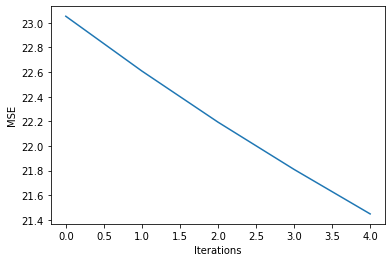

In [188]:
plt.figure()
plt.plot(hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [190]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[0.665, 0.463, 0.463, ..., 0.787, 0.354, 1.049],
       [1.157, 0.804, 0.804, ..., 1.369, 0.614, 1.822],
       [1.492, 0.943, 0.962, ..., 1.777, 0.705, 2.276],
       ...,
       [0.705, 0.352, 0.381, ..., 0.851, 0.247, 1.003],
       [1.005, 0.723, 0.718, ..., 1.185, 0.556, 1.602],
       [1.21 , 0.739, 0.76 , ..., 1.445, 0.548, 1.826]])

In [191]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df_copy_2.columns

In [192]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, 0.6653435134699611)","(8.79, 0.46329905320058606)","(-9.66, 0.46308908593138637)","(-8.16, -0.3154612238539438)","(-7.52, 0.4556551197005774)","(-8.5, 1.1486132524726267)","(-9.85, 0.00014780597560373475)","(4.17, -0.15572126844049025)","(-8.98, 0.015731623007705996)","(-4.76, 0.8222464304094134)","(-8.5, 1.223244839491983)","(-6.75, 1.1426878663648685)","(-7.18, -0.6876196245515899)","(8.45, 1.13277639593339)","(-7.18, -0.7334583492315218)","(-7.52, -1.3724918601486413)","(-7.43, -0.3046253160603499)","(-9.81, -0.14082093970184734)","(-9.85, 0.3212408911851043)","(-9.85, -0.14337505264293082)","(-9.37, 1.415185168381791)","(1.5, 0.7770305624000732)","(-4.37, 0.37225795850860954)","(-9.81, -0.5151408417023036)","(-8.5, 0.5865359284242279)","(1.12, 1.0465851200874956)","(7.82, 1.8429820765300677)","(2.86, 1.1107754409957862)","(9.13, 1.7149670090513007)","(-7.43, 0.19442203852924297)","(2.14, 1.4485234489396566)","(-4.08, 1.8162292024251399)","(-9.08, -0.2739821423326321)","(7.82, 0.8611804537997321)","(5.05, 1.772471974760253)","(4.95, 1.8490207247944874)","(-9.17, -0.3762821545534477)","(-8.4, 0.9092954304794943)","(-8.4, 0.9473260168224399)","(-8.4, 0.854271318869803)",...,"(8.59, 1.5637501293517406)","(3.59, 1.7459992968811655)","(-6.84, 0.511065530205459)","(-9.03, -0.0038576168728772383)","(2.82, 1.5044201331349787)","(-1.36, 1.5816330644362413)","(-9.08, -0.10624610752066736)","(8.3, 1.586449248295915)","(5.68, 1.6204805497879047)","(-4.81, 0.6296496761266162)","(99.0, -0.021049205925021523)","(99.0, 1.638776895935574)","(99.0, 0.9162258995855658)","(99.0, -0.37113252178899364)","(99.0, 0.21360738800501836)","(99.0, 1.473698442558307)","(99.0, 0.7160137819096842)","(-9.42, 1.1988160959498795)","(99.0, 0.4535413024901631)","(99.0, 1.0020159048436716)","(99.0, 1.22786457393594)","(-7.72, 0.7951070394083153)","(99.0, 1.3392253865778405)","(99.0, 0.6900426935695331)","(99.0, 0.8066523600511722)","(99.0, 0.42408170569525233)","(99.0, 1.2094433069515562)","(99.0, 1.2539361417173707)","(99.0, 1.9464858717159248)","(99.0, 0.6363370960798848)","(2.82, 1.2485603447783915)","(99.0, 0.9005411756697442)","(99.0, 1.4862733564289345)","(99.0, 0.8176511008388678)","(99.0, 0.7731639653989405)","(99.0, 1.0273788609890178)","(-5.63, 1.0692522010186267)","(99.0, 0.7869071456934843)","(99.0, 0.35419673175794697)","(99.0, 1.048537437316395)"
1,"(4.08, 1.1569794932720927)","(-0.29, 0.8039485592328054)","(6.36, 0.8039381736492157)","(4.37, -0.5520802667949184)","(-2.38, 0.7916550813665174)","(-9.66, 1.9967520542817712)","(-0.73, 0.0014270250297509408)","(-5.34, -0.2719808898535218)","(8.88, 0.025422252770363613)","(9.22, 1.431129301643555)","(6.75, 2.1260252244855757)","(8.64, 1.986153383178884)","(4.42, -1.1966030464596757)","(7.43, 1.968222055966047)","(4.56, -1.276471674221296)","(-0.97, -2.388511659238728)","(4.66, -0.5312277297815029)","(-0.68, -0.2463921821149001)","(3.3, 0.5587256242652799)","(-1.21, -0.2521950018881148)","(0.87, 2.461404194897759)","(8.64, 1.3514439026313707)","(8.35, 0.6463231494453492)","(9.17, -0.8991250735645054)","(0.05, 1.0190793309525208)","(7.57, 1.8199006375901607)","(4.71, 3.2049877211569346)","(0.87, 1.9304832969890273)","(-0.39, 2.984551397684555)","(6.99, 0.3351304594279755)","(6.5, 2.519035170042717)","(-0.92, 3.160548662951811)","(7.14, -0.4792326656463549)","(9.03, 1.4959511918796469)","(-1.8, 3.08337345865666)","(0.73, 3.217265928239284)","(7.09, -0.6562957568468654)","(3.4, 1.581865731196762)","(-0.87, 1.6471619032621208)","(7.91, 1.4869196008600116)",...,"(-6.7, 2.719855050349718)","(-3.35, 3.0380490765477286)","(-9.03, 0.8870364264193819)","(4.47, -0.009326998529934898)","(4.08, 2.6156738926031506)","(-3.83, 2.7507012971725566)","(8.74, -0.1861055440434562)

In [193]:
df2.iloc[2700, 69]

-2.62

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
quiz_movie_itm = pd.read_excel('/content/movies_latent_factors.xlsx', sheet_name='Items')
quiz_movie_usr = pd.read_excel('/content/movies_latent_factors.xlsx', sheet_name='Users')

In [196]:

quiz_movie_usr.head()

,User,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
0,4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
1,156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
2,5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
3,174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4,4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669


In [197]:
np.where(quiz_movie_itm['Movie ID']==9802)

(array([94]),)

In [198]:
quiz_movie_itm.iloc[94]

Movie ID               9802
Title       The Rock (1996)
Factor1            0.934442
Factor2           -0.242125
Factor3           -0.448292
Factor4           -0.796867
Factor5         -0.00480843
Factor6            0.182001
Factor7           -0.381535
Factor8           -0.365665
Factor9            0.396208
Factor10            1.37216
Factor11          -0.138562
Factor12           0.639812
Factor13           0.624284
Factor14          -0.833687
Factor15          -0.108544
Name: 94, dtype: object

In [199]:
quiz_movie_itm.iloc[65,11]

1.5465933644886969

In [200]:
np.argmax(quiz_movie_itm['Factor4'])

96

In [201]:
quiz_movie_itm.iloc[96]

Movie ID                          10020
Title       Beauty and the Beast (1991)
Factor1                         1.28629
Factor2                      0.00495723
Factor3                        -0.15764
Factor4                         2.57964
Factor5                      -0.0426869
Factor6                       -0.256582
Factor7                     -0.00797103
Factor8                        0.458163
Factor9                       0.0913944
Factor10                       0.323339
Factor11                      -0.862833
Factor12                      -0.508185
Factor13                       0.994535
Factor14                         0.8687
Factor15                      -0.487076
Name: 96, dtype: object

In [202]:
copy_items = quiz_movie_itm.drop(['Movie ID','Title'], axis=1)
copy_users = quiz_movie_usr.drop(['User'], axis=1)

users_pref= copy_users.values
items_lf= copy_items.values

ratings = users_pref.dot(items_lf.T)
ratings_df= pd.DataFrame(ratings)

In [203]:
us_id = quiz_movie_usr['User'].values
it_id = quiz_movie_itm['Movie ID'].values

resx =np.where(us_id == 1882)
resy=np.where(it_id == 2501)
print(resx, resy)

(array([9]),) (array([83]),)


In [204]:

us_id = quiz_movie_usr['User'].values
it_id = quiz_movie_itm['Movie ID'].values

resx =np.where(us_id == 768)
resy=np.where(it_id == 187)
print(resx, resy)

(array([7]),) (array([24]),)


In [205]:
ratings_df.iloc[resx[0],resy[0]]

,24
7,-0.055531


In [206]:
rec=np.where(us_id == 768)
print(rec)

(array([7]),)


In [207]:
ratings_df.iloc[7,]

0     0.028389
1     0.017066
2    -0.025851
3     0.030142
4     0.034771
        ...   
95   -0.035948
96    0.068169
97   -0.098649
98   -0.085649
99   -0.006351
Name: 7, Length: 100, dtype: float64

In [208]:
c1 = ratings_df.iloc[3,0]
c2 = ratings_df.iloc[3,1]
c3 = ratings_df.iloc[3,2]
for i in ratings_df.columns:
  if ratings_df.iloc[3,i]>c1:
    c3 = c2
    c2 = c1
    c1 = ratings_df.iloc[21,i]
    c2 
print(c1,c2,c3)

0.6003798804270912 0.15485750973438986 0.060161194246751176
